In [2]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

![simulator](simulator.png)

Simulator Pemadam Kebakaran Berbasis Fuzzy

In [3]:
# Fungsi Keanggotaan Input Output
Suhu = np.arange(0, 255, 1)
Asap = np.arange(0, 255, 1)
Semprotan = np.arange(0, 255, 1)

# Fungsi Keanggotaan Suhu
t_Suhu_Rendah = fuzz.trapmf(Suhu, [-1, 0, 100, 255]) 
t_Suhu_Tinggi = fuzz.trapmf(Suhu, [0, 155, 255, 256])  

# Fungsi Keanggotaan Asap
t_Asap_Sedikit = fuzz.trapmf(Asap, [-1, 0, 100, 255])  
t_Asap_Banyak  = fuzz.trapmf(Asap, [0, 155, 255, 256])     

# Fungsi Keanggotaan Semprotan
t_Semprotan_Kecil = fuzz.trapmf(Semprotan, [-1, 0, 100, 255])  
t_Semprotan_Besar = fuzz.trapmf(Semprotan, [0, 155, 255, 256])   


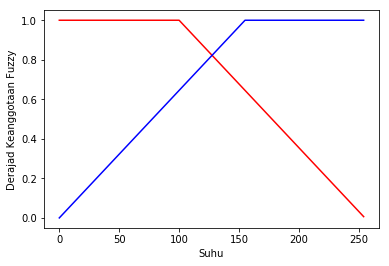

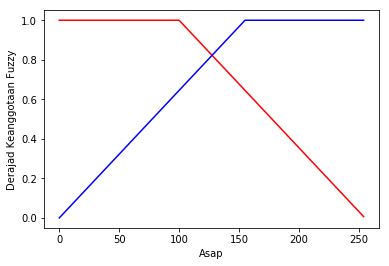

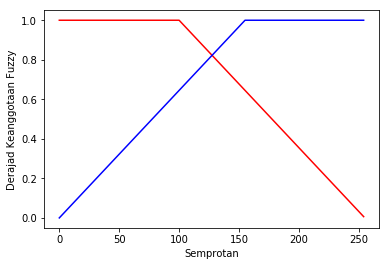

In [4]:
# Visualisasi Fungsi Keanggotaan Suhu
fig, ax = plt.subplots()
ax.plot(Suhu, t_Suhu_Rendah, 'r', Suhu, t_Suhu_Tinggi, 'b')
ax.set_ylabel('Derajad Keanggotaan Fuzzy')
ax.set_xlabel('Suhu')
ax.set_ylim(-0.05, 1.05);

# Visualisasi Fungsi Keanggotaan Asap
fig, ax = plt.subplots()
ax.plot(Asap, t_Asap_Sedikit, 'r', Asap, t_Asap_Banyak, 'b')
ax.set_ylabel('Derajad Keanggotaan Fuzzy')
ax.set_xlabel('Asap')
ax.set_ylim(-0.05, 1.05);

# Visualisasi Fungsi Keanggotaan Semprotan
fig, ax = plt.subplots()
ax.plot(Semprotan, t_Semprotan_Kecil, 'r', Semprotan, t_Semprotan_Besar, 'b')
ax.set_ylabel('Derajad Keanggotaan Fuzzy')
ax.set_xlabel('Semprotan')
ax.set_ylim(-0.05, 1.05);

Inference Rule

In [5]:
def Suhu_category(Suhu_in = 1):
    Suhu_cat_Rendah = fuzz.interp_membership(Suhu, t_Suhu_Rendah, Suhu_in) 
    Suhu_cat_Tinggi = fuzz.interp_membership(Suhu, t_Suhu_Tinggi, Suhu_in)
    return dict(Rendah = Suhu_cat_Rendah, Tinggi = Suhu_cat_Tinggi)

def Asap_category(Asap_in = 2):
    Asap_cat_Sedikit = fuzz.interp_membership(Asap, t_Asap_Sedikit, Asap_in)
    Asap_cat_Banyak  = fuzz.interp_membership(Asap, t_Asap_Banyak, Asap_in)
    return dict(Sedikit = Asap_cat_Sedikit, Banyak = Asap_cat_Banyak)

# Contoh input 
Suhu_in = Suhu_category(100)
Asap_in = Asap_category(100)
print ("Suhu terukur"), Suhu_in
print ("Asap terukur"), Asap_in 

Suhu terukur
Asap terukur


(None, {'Sedikit': 1.0, 'Banyak': 0.6451612903225806})

In [6]:
rule1 = np.fmin(Suhu_in['Tinggi'], Asap_in['Banyak'])
rule2 = np.fmin(Suhu_in['Tinggi'], Asap_in['Sedikit'])
rule3 = np.fmin(Suhu_in['Rendah'], Asap_in['Banyak'])
rule4 = np.fmin(Suhu_in['Rendah'], Asap_in['Sedikit'])

In [7]:
imp1 = np.fmin(rule1, t_Semprotan_Besar)
imp2 = np.fmin(rule2, t_Semprotan_Besar)
imp3 = np.fmin(rule3, t_Semprotan_Kecil)
imp4 = np.fmin(rule4, t_Semprotan_Kecil)

# Defuzzification

In [8]:
# Hitung aggregat semua output
aggregate_membership = np.fmin(imp1, np.fmin(imp2, np.fmin(imp3,imp4)))


In [9]:
# Hitung Defuzzifikasi menggunakan centroid
result_Semprotan = fuzz.defuzz(Semprotan, aggregate_membership , 'centroid')
print (result_Semprotan)

127.49590847016553


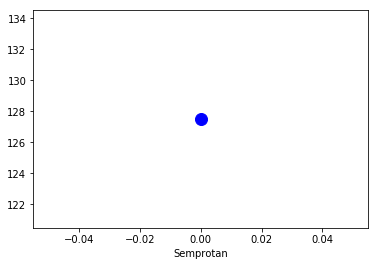

In [10]:
# Visualisasi
plt.plot(result_Semprotan, 'bo', linewidth=2, markersize=12)
plt.xlabel('Semprotan');